In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive ## drive a bağlanmak için
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/project/data.csv /tmp/ ## drive den dosyayı cloab'a kopyalıyoruz. Bu sayede data'yı daha hızlı işleyebiliyoruz.

In [4]:
data = pd.read_csv('/tmp/data.csv') ## datayı yüklüyoruz.
data.head() #datasetin ilk 5 verisini gösterir


,Haber Gövdesi,Sınıf
0,"Para, şöhret, hepsi var! Peki neden boşanıyorl...",Magazin
1,"Sosyetik güzel Eda Taşpınar, önceki gün Taraby...",Magazin
2,"Suudi Arabistan, İsrail ablukası altındaki Gaz...",Siyaset
3,"MHP Lideri Devlet Bahçeli'den ""Selahattin Demi...",Siyaset
4,"Sıla koronavirüse yakalandı, konserleri ertele...",Magazin


In [5]:
data['Haber Gövdesi'] = data['Haber Gövdesi'].apply(lambda x: ' '.join([re.sub(r"[^a-zA-Z]", " ", word.lower()) for word in x.split() ]))
## datadan numaraları ve noktalama işlemlerini çıkarıyoruz. Sadece küçük harf ve büyük harflerden oluşan kelimeler kalıyor.
categories = data['Sınıf'].values
texts = data['Haber Gövdesi'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(texts, categories, random_state=1, test_size = 0.2) # verisetini eğitim ve test diye ayırıyoruz

In [7]:
vect = CountVectorizer()
vect.fit(X_train) ## vektörize etmek için modeli eğitiyoruz.

X_train_dtm = vect.transform(X_train)  ## train verilerini vektörize ediyoruz. yani veri seti kaç boyutluysa artık, o kadar uzay oluşturup kelimeleri vektörleştiriyoruz.

print(type(X_train_dtm), X_train_dtm.shape)

X_test_dtm = vect.transform(X_test)  ## train verilerini vektörize ediyoruz. yani veri seti kaç boyutluysa artık, o kadar uzay oluşturup kelimeleri vektörleştiriyoruz.
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (1188807, 1174191)
<class 'scipy.sparse._csr.csr_matrix'> (297202, 1174191)


In [8]:
tfidf_transformer = TfidfTransformer() ## öznitelik çıkarmak için tf-idf yöntemini kullanıyoruz.
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<1188807x1174191 sparse matrix of type '<class 'numpy.float64'>'
	with 164812117 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [9]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [10]:
y_pred_class = nb.predict(X_test_dtm)
print(classification_report(y_test, y_pred_class))

                 precision    recall  f1-score   support

Bilim-Teknoloji       0.69      0.81      0.75     13540
 Finans-Ekonomi       0.84      0.74      0.79     13145
   Kültür-Sanat       0.72      0.80      0.76     20142
        Magazin       0.96      0.92      0.94     97905
         Sağlık       0.90      0.93      0.91     24381
        Siyaset       0.89      0.92      0.90     61173
           Spor       0.97      0.95      0.96     45908
         Turizm       0.80      0.77      0.78     14275
          Çevre       0.64      0.58      0.61      6733

       accuracy                           0.89    297202
      macro avg       0.82      0.82      0.82    297202
   weighted avg       0.89      0.89      0.89    297202



<Axes: >

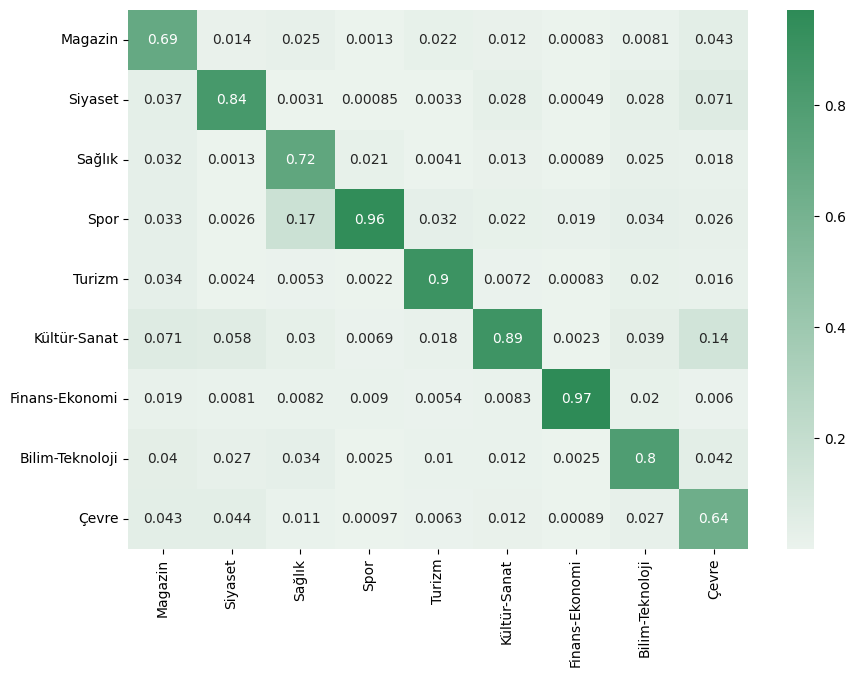

In [11]:
result = confusion_matrix(y_test, y_pred_class , normalize='pred')
target_names = data.Sınıf.unique()

df_cm = pd.DataFrame(result, index = [i for i in target_names],
                  columns = [i for i in target_names])

plt.figure(figsize = (10,7))
color = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=color)

### SGD Classifier

In [28]:
clf_sgd = SGDClassifier(max_iter=500, tol=1e-3)
clf_sgd.fit(X_train_dtm, y_train)

SGDClassifier(max_iter=500)

In [29]:
y_pred_class = clf_sgd.predict(X_test_dtm)
print(classification_report(y_test, y_pred_class))

                 precision    recall  f1-score   support

Bilim-Teknoloji       0.93      0.77      0.84     13540
 Finans-Ekonomi       0.88      0.77      0.82     13145
   Kültür-Sanat       0.88      0.72      0.79     20142
        Magazin       0.91      0.97      0.94     97905
         Sağlık       0.95      0.92      0.93     24381
        Siyaset       0.88      0.95      0.92     61173
           Spor       0.98      0.95      0.97     45908
         Turizm       0.83      0.82      0.83     14275
          Çevre       0.75      0.65      0.70      6733

       accuracy                           0.91    297202
      macro avg       0.89      0.84      0.86    297202
   weighted avg       0.91      0.91      0.91    297202



<Axes: >

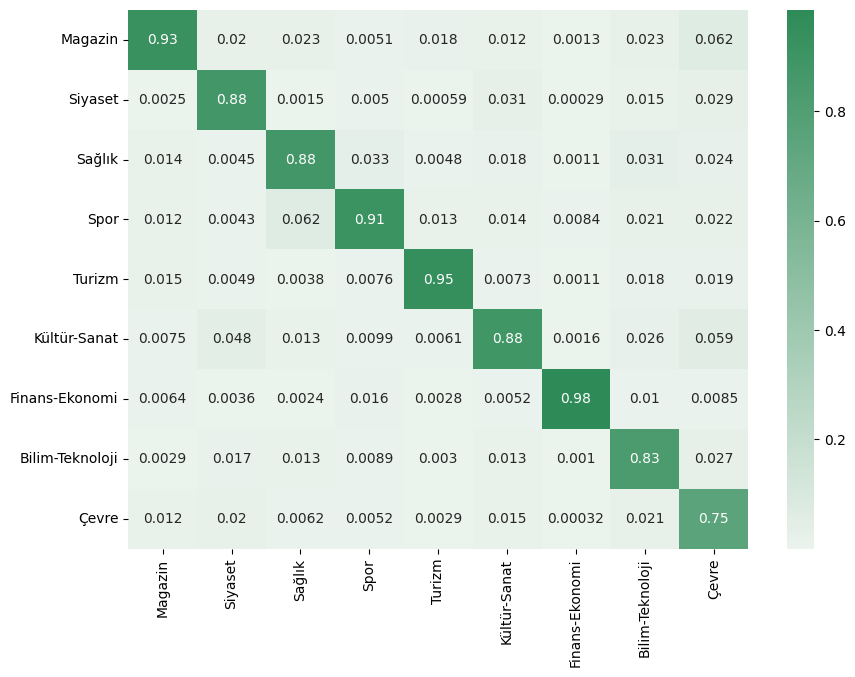

In [30]:
result = confusion_matrix(y_test, y_pred_class , normalize='pred')
target_names = data.Sınıf.unique()

df_cm = pd.DataFrame(result, index = [i for i in target_names],
                  columns = [i for i in target_names])

plt.figure(figsize = (10,7))
color = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=color)